## SESSION 1 STARTER CODE
### Building an MLP (Basic Deep Neural Network)


Building a Neural Network for Multiclass Classification

In this session, we will:
- Build a neural network using TensorFlow and Keras
- Use the MNIST dataset of handwritten digits (0–9)
- Train and evaluate a model for **multiclass classification**
- Understand the core steps:
  1. Loading and preparing data
  2. Building the model
  3. Compiling the model
  4. Training the model
  5. Evaluating and visualizing results

This will help you understand the **basic workflow** of building deep learning models before we move to more advanced concepts in Session 2.

In [1]:
# TensorFlow & Keras for building and training deep neural networks
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## Step 1: Loading and Exploring the Data

The MNIST dataset contains:
- 60,000 training images
- 10,000 test images
- Each image is 28x28 pixels, grayscale

The task is to classify each image into one of **10 classes (digits 0-9)**.

Steps:
1. Load the dataset directly from `tf.keras.datasets`.
2. Normalize the pixel values from `[0, 255]` to `[0, 1]` for stable training.
3. Visualize a few sample images.

In [3]:
# Load and Preprocess Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data (0-255 -> 0-1)
train_images = train_images / 255.0  # Hint: divide by 255.0
test_images = test_images / 255.0   # Hint: divide by 255.0

# Print shapes to confirm
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Class labels
class_names = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


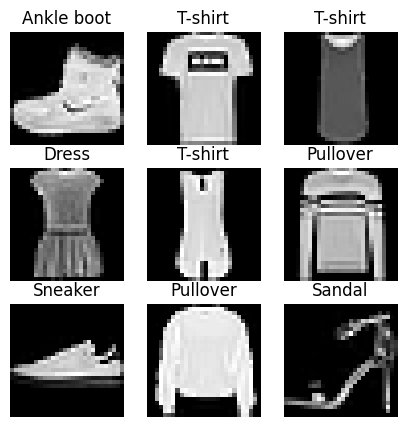

In [4]:
# Visualize some images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()


## Step 2: Building the Neural Network

We will build two versions of the model for you to learn but in practive you need just one:
- **Sequential API**: Simple, stack layers linearly.
- **Functional API**: More flexible and powerful for complex architectures.

### Architecture:
1. **Flatten Layer**: Converts 28x28 images into 784-element vectors.
2. **Hidden Layers**:
   - Dense layer with 512 neurons and ReLU activation
   - Dense layer with 256 neurons and ReLU activation
3. **Output Layer**:
   - Dense layer with 10 neurons (one for each digit)
   - Softmax activation to output probabilities

Why Softmax?
- Ensures the outputs represent a probability distribution across the 10 classes.

In [5]:
# Build Model - Sequential API
def build_sequential_model():
    """
    Build a deep neural network using the Sequential API.
    """
    model = tf.keras.models.Sequential([
        # Flatten converts 28x28 images into a vector of 784 pixels
        Flatten(input_shape=(28, 28)),  # Hint: Flatten(input_shape=(28, 28))

        # First hidden layer
        Dense(512, activation='relu', name="Hidden_Layer_1"),  # Hint: Dense(512, activation='relu', name="Hidden_Layer_1")

        # Second hidden layer
        Dense(256, activation='relu', name="Hidden_Layer_2"),  # Hint: Dense(256, activation='relu', name="Hidden_Layer_2")

        # Output layer with softmax for 10 classes
        Dense(10, activation='softmax', name="Output_Layer")   # Hint: Dense(10, activation='softmax', name="Output_Layer")
    ])
    return model

# Build Model - Functional API
def build_functional_model():
    """
    Build the same deep neural network using the Functional API.
    """
    # Define input
    inputs = Input(shape=(28, 28), name="Input_Layer")  # Hint: Input(shape=(28, 28), name="Input_Layer")

    # Flatten layer
    x = Flatten(name="Flatten")(inputs)  # Hint: Flatten(name="Flatten")(inputs)

    # First hidden layer
    x = Dense(512, activation='relu', name="Hidden_Layer_1")(x)  # Hint: Dense(512, activation='relu', name="Hidden_Layer_1")(x)

    # Second hidden layer
    x = Dense(256, activation='relu', name="Hidden_Layer_2")(x)  # Hint: Dense(256, activation='relu', name="Hidden_Layer_2")(x)

    # Output layer
    outputs = Dense(10, activation='softmax', name="Output_Layer")(x)  # Hint: Dense(10, activation='softmax', name="Output_Layer")(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name="Functional_Model")  # Hint: Model(inputs=inputs, outputs=outputs, name="Functional_Model")
    return model

## Compiling the Model

Before training, we must configure the model with:
1. **Optimizer**: Controls how weights are updated (we use Adam). You can try others like SGD (Stochastic Gradient Descent), and many others exist which you can check out.
2. **Loss Function**: Sparse categorical cross-entropy for multiclass labels.
3. **Metrics**: Accuracy to monitor performance during training.

Why Sparse Categorical Cross-Entropy?
- Labels are integers (0–9), not one-hot encoded.

In [7]:
# Compile Model
model = build_sequential_model()  # Hint: build_sequential_model() or build_functional_model().
model.summary()
plot_model(model, show_shapes=True, to_file="session1_model.png")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),   # Hint: tf.keras.optimizers.Adam(learning_rate=0.001), or tf.keras.optimizers.SGD(learning_rate=0.001)
    loss='sparse_categorical_crossentropy',        # Hint: 'sparse_categorical_crossentropy'
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

We will:
- Train the model using the `fit()` function.
- Reserve 20% of the training data for validation.
- Train for 10 epochs initially.

**What to watch during training:**
- **Training accuracy and loss**: How well the model fits the training data.
- **Validation accuracy and loss**: How well the model generalizes to unseen data.
- A widening gap between training and validation metrics may indicate overfitting.

In [9]:
# Train Model
history = model.fit(
    train_images,  # Hint: training images
    train_labels,  # Hint: training labels
    validation_split=0.2,
    epochs=10,  # Hint: try 10
    batch_size=32,
    verbose=1
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7841 - loss: 0.6006 - val_accuracy: 0.8554 - val_loss: 0.3957
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8625 - loss: 0.3736 - val_accuracy: 0.8657 - val_loss: 0.3695
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8784 - loss: 0.3306 - val_accuracy: 0.8738 - val_loss: 0.3528
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8866 - loss: 0.3015 - val_accuracy: 0.8746 - val_loss: 0.3572
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8929 - loss: 0.2809 - val_accuracy: 0.8789 - val_loss: 0.3479
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8988 - loss: 0.2650 - val_accuracy: 0.8808 - val_loss: 0.3478
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9059 - loss: 0.2480 - val_accuracy: 0.8773 - val_loss: 0.3598
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9100 - loss: 0

## Evaluating and Visualizing Results

We now evaluate the model on the **test set**, which contains data the model has never seen.

We will also plot:
- Loss over epochs
- Accuracy over epochs

**Goal:**
- Verify that the model performs well on unseen data.
- Look for patterns of underfitting or overfitting.

In [10]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.8745
Test Loss: 0.3988


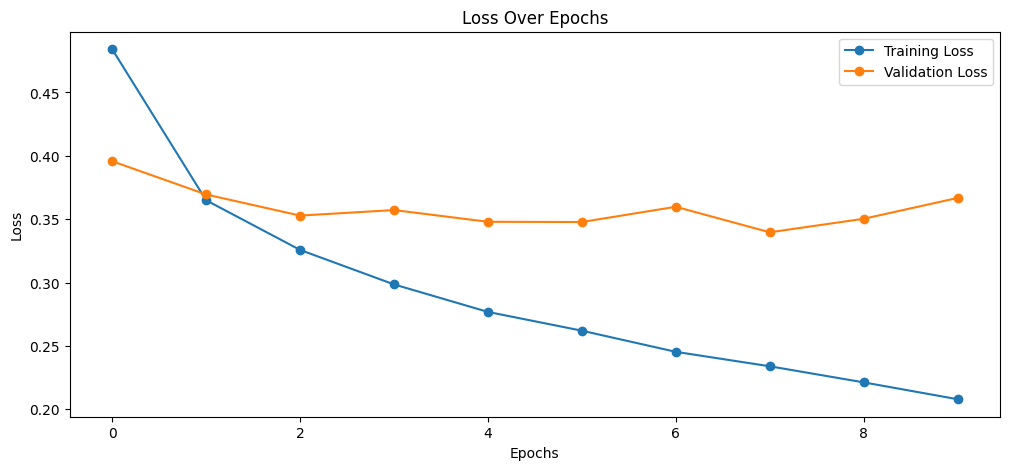

In [11]:
# Plot Training Loss Curve
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()